In [1]:
import os
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_cmaes = pd.read_csv("../experiments/cmaes_50_1118_fit_wide_by_age/experiment_results.csv", sep=",")
mask = df_cmaes["cost"] > 1
print(f"CMA-ES total individuals {df_cmaes.shape[0]}, total anomalies {sum(mask)}")
df_cmaes = df_cmaes.loc[~mask, :]

df_cmaes_old = pd.read_csv("../experiments/cmaes_50_1118_fit_wide/experiment_results.csv", sep=",")
mask = df_cmaes_old["cost"] > 1
print(f"CMA-ES total individuals {df_cmaes_old.shape[0]}, total anomalies {sum(mask)}")
df_cmaes_old = df_cmaes_old.loc[~mask, :]

df_ga = pd.read_csv("../experiments/ga_50_1118_fit_wide/experiment_results.csv", sep=",")
mask = df_ga["cost"] > 1
print(f"GA total individuals {df_ga.shape[0]}, total anomalies {sum(mask)}")
df_ga = df_ga.loc[~mask, :]

df_cmaes_old['algorithm'] = "CMA-ES-OLD"
df_cmaes['algorithm'] = "CMA-ES"
df_ga['algorithm'] = "GA"
df_full = pd.concat([df_cmaes_old, df_cmaes, df_ga])

df_full = df_full.sort_values(by="cost")
print(df_full.columns)

CMA-ES total individuals 55900, total anomalies 23
CMA-ES total individuals 55900, total anomalies 16
GA total individuals 33848, total anomalies 7
Index(['instance_path', 'gen', 'ind', 'βᴬ', 'βᴵ', 'ηᵍY', 'ηᵍM', 'ηᵍO', 'αᵍY',
       'αᵍM', 'αᵍO', 'μᵍY', 'μᵍM', 'μᵍO', 'γᵍY', 'ϕs_0', 'δs_0', 'cost',
       'algorithm', 'γᵍM', 'γᵍO', 'ϕs', 'δs'],
      dtype='object')


In [4]:
df_full[["cost","algorithm"]].head()



cost   algorithm
0  0.000623  CMA-ES-OLD
1  0.000624  CMA-ES-OLD
2  0.000624  CMA-ES-OLD
3  0.000624  CMA-ES-OLD
4  0.000624  CMA-ES-OLD

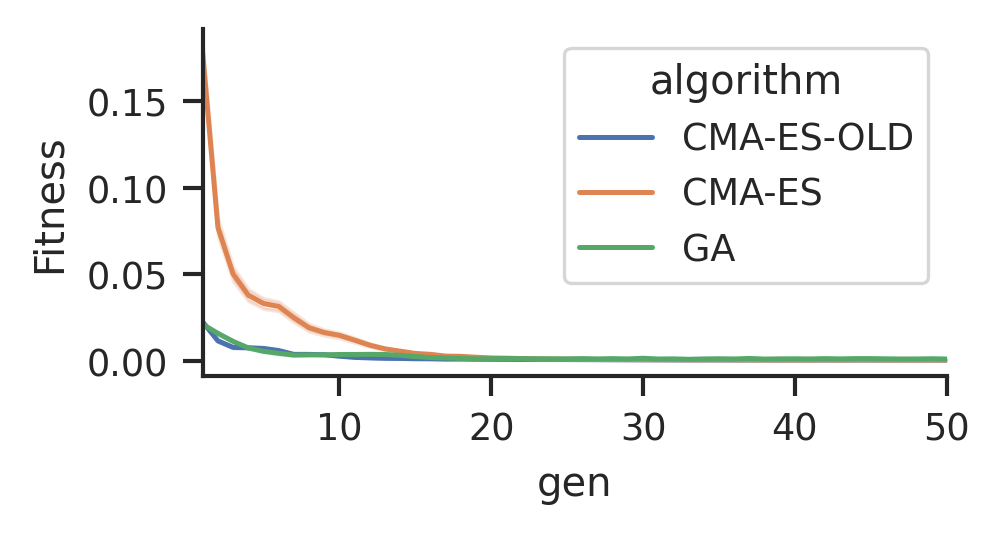

In [32]:
sns.set_theme("paper")
sns.set_style("ticks")

fig, ax = plt.subplots(1,1,figsize=(3.2,1.5), dpi=300)
mask = df_full["gen"] >= 1
sns.lineplot(df_full[mask], x="gen", y="cost", hue="algorithm", ax=ax)

ax.set_xlim(1,50)
ax.set_ylabel("Fitness")

sns.despine()

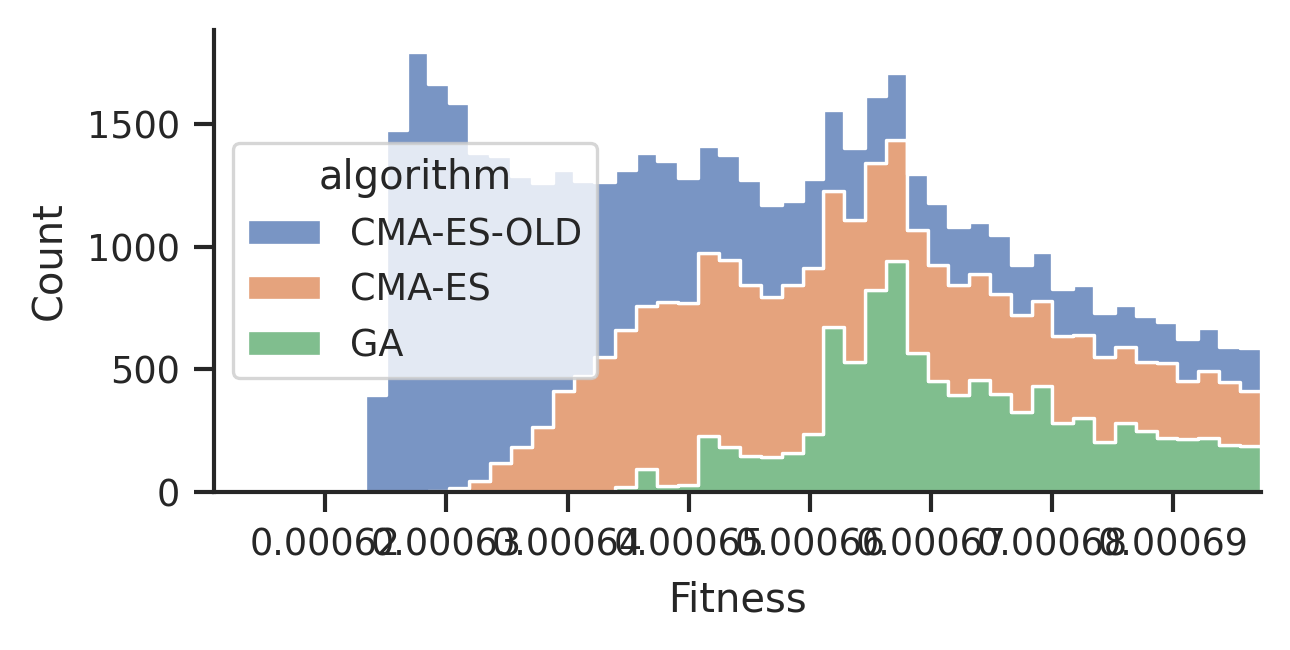

In [6]:
sns.set_theme("paper")
sns.set_style("ticks")

k = 50000
data = df_full.head(k)


fig, ax = plt.subplots(1,1,figsize=(4.5,2), dpi=300)
sns.histplot(data, x="cost", ax=ax, hue="algorithm", multiple="stack",  element="step")

ax.set_xlim(data["cost"].min() * 0.98, data["cost"].max())
ax.set_xlabel("Fitness")

sns.despine()

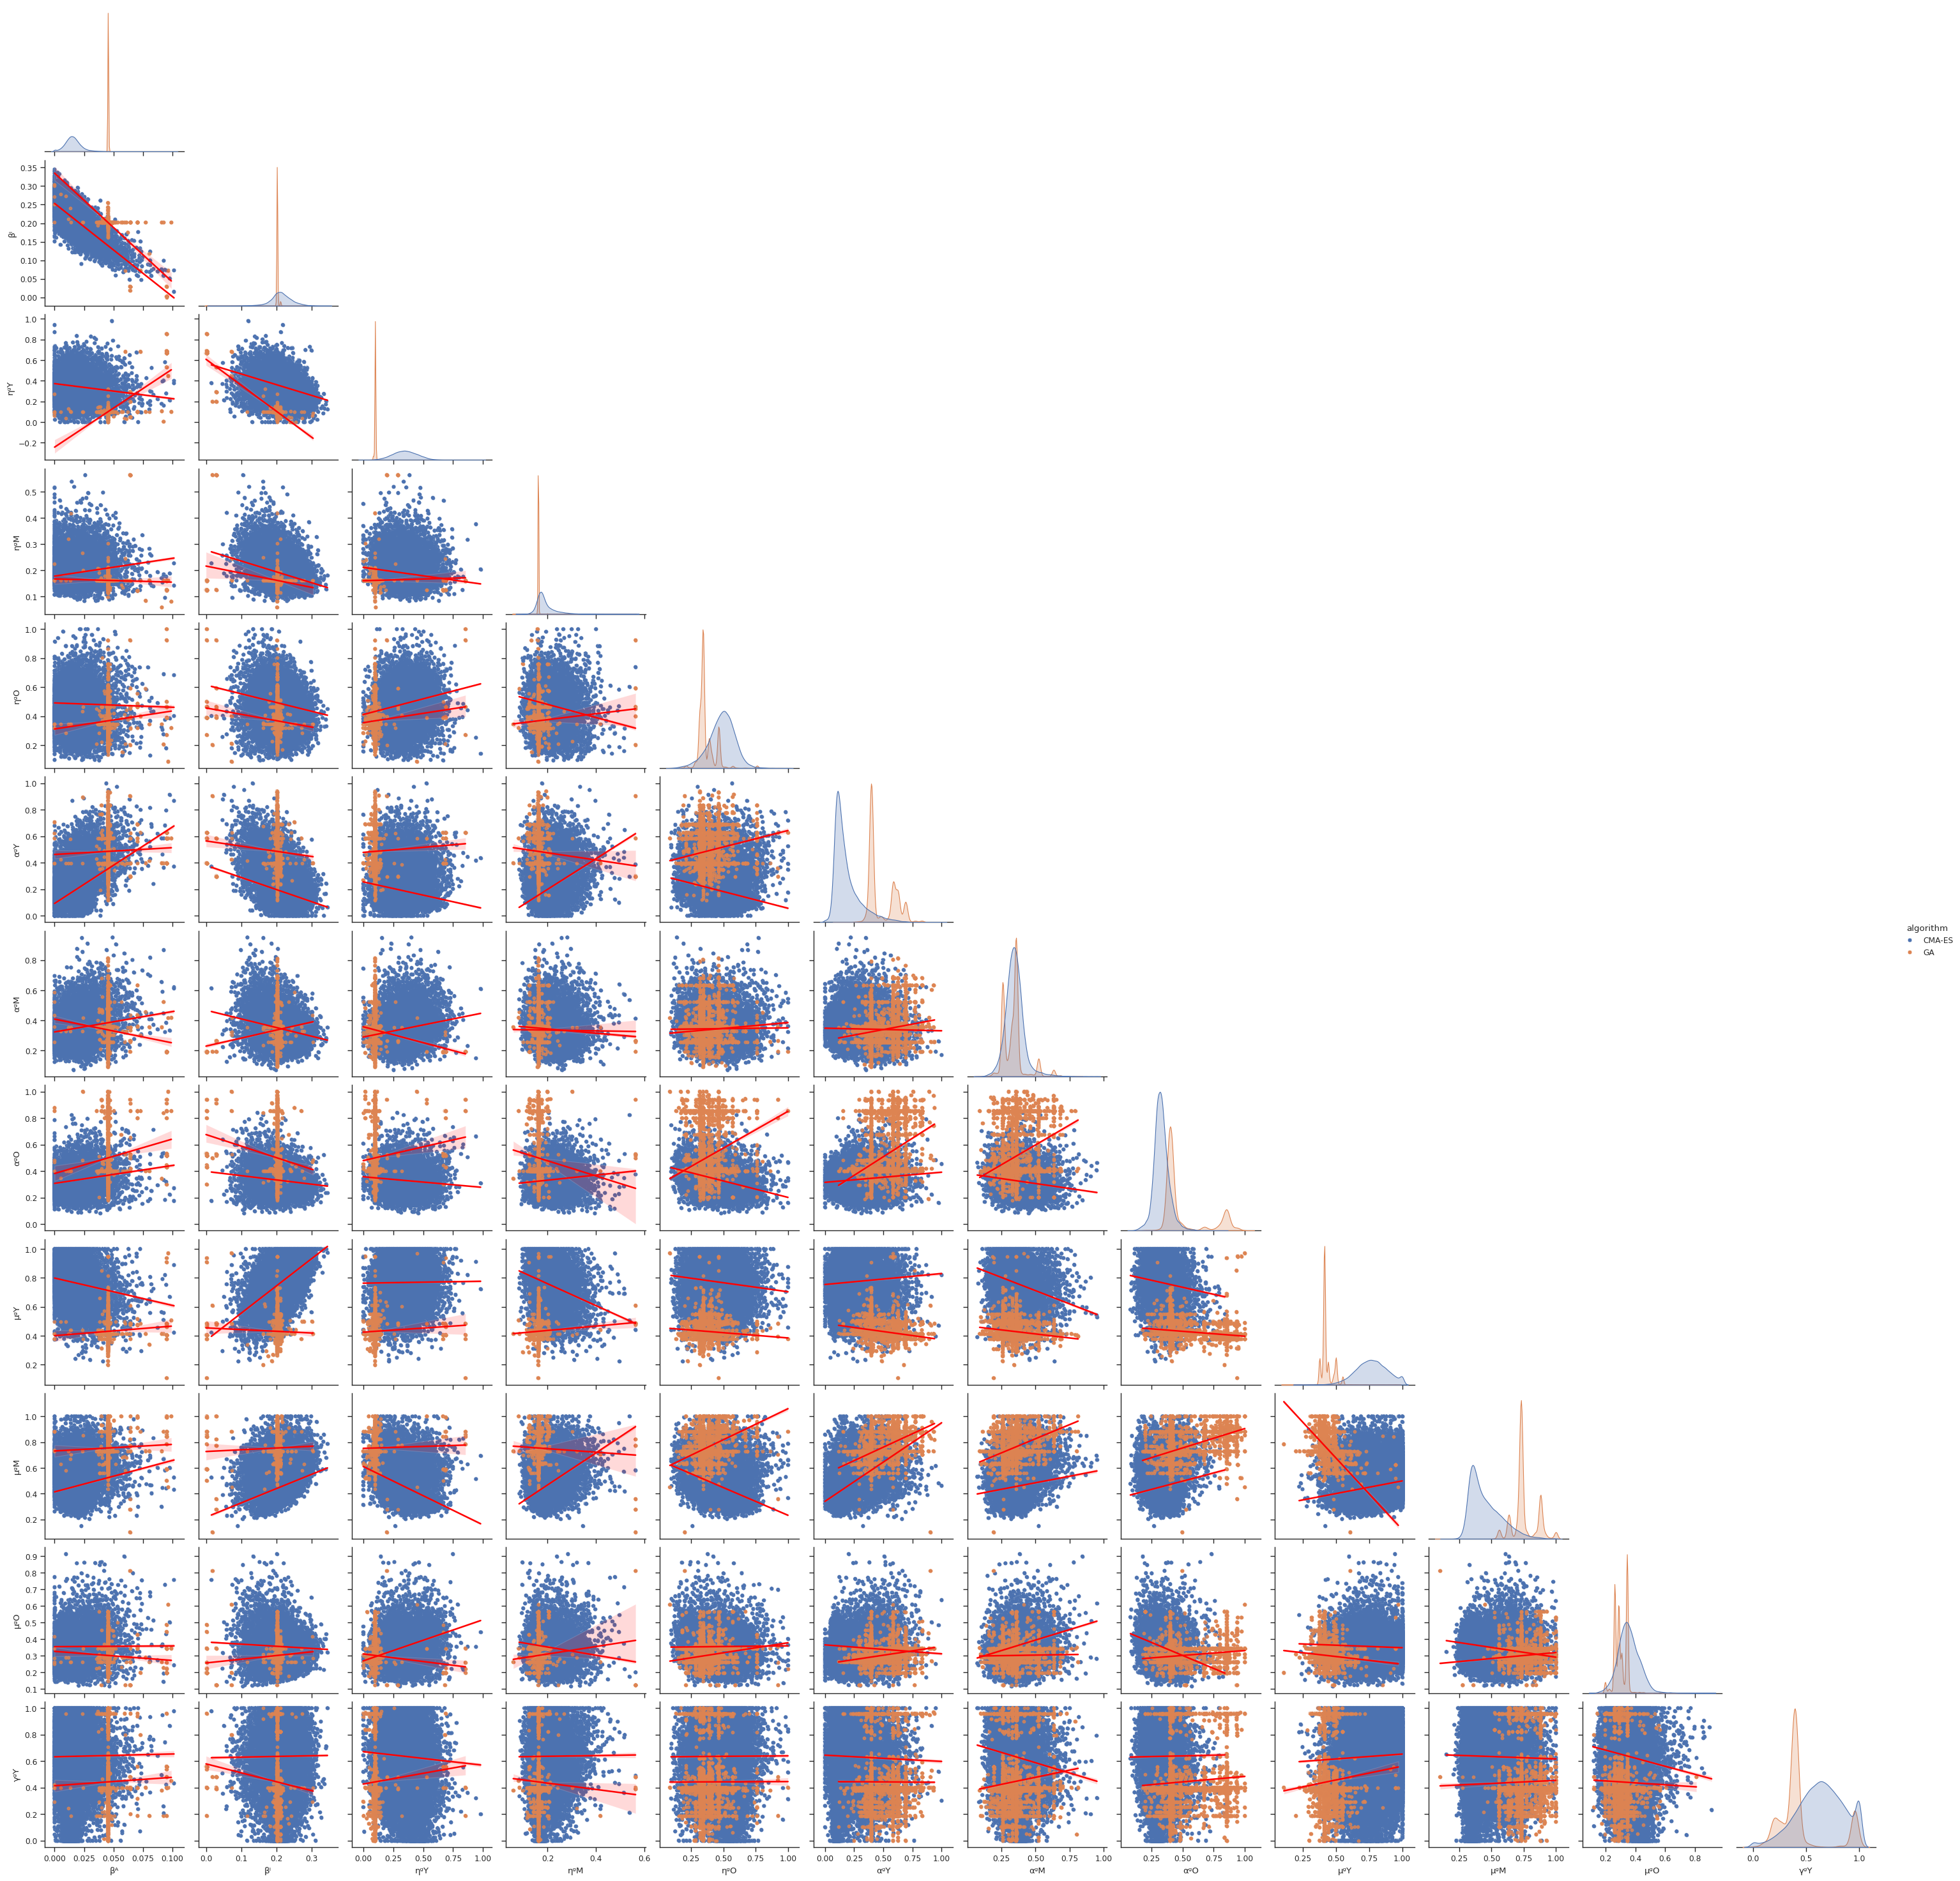

In [107]:
# thr = 0.000624
# mask = data["cost"]<=thr
# data["class"] = "common"
# data.loc[mask, "class"] = "top"
eps = 0.000625
# mask = df["cost"] <= eps
epi_params = ['βᴬ', 'βᴵ', 'ηᵍY', 'ηᵍM', 'ηᵍO', 'αᵍY', 'αᵍM', 'αᵍO', 'μᵍY', 'μᵍM', 'μᵍO', 'γᵍY', 'algorithm'] 
g = sns.pairplot(data.loc[:, epi_params], kind="scatter", diag_kind="kde", corner=True, hue="algorithm")

# g.map_upper(sns.regplot, scatter_kws={'s': 10}, line_kws={'color': 'red'})
g.map_lower(sns.regplot, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# g.map_lower(sns.histplot, levels=4, color=".2")

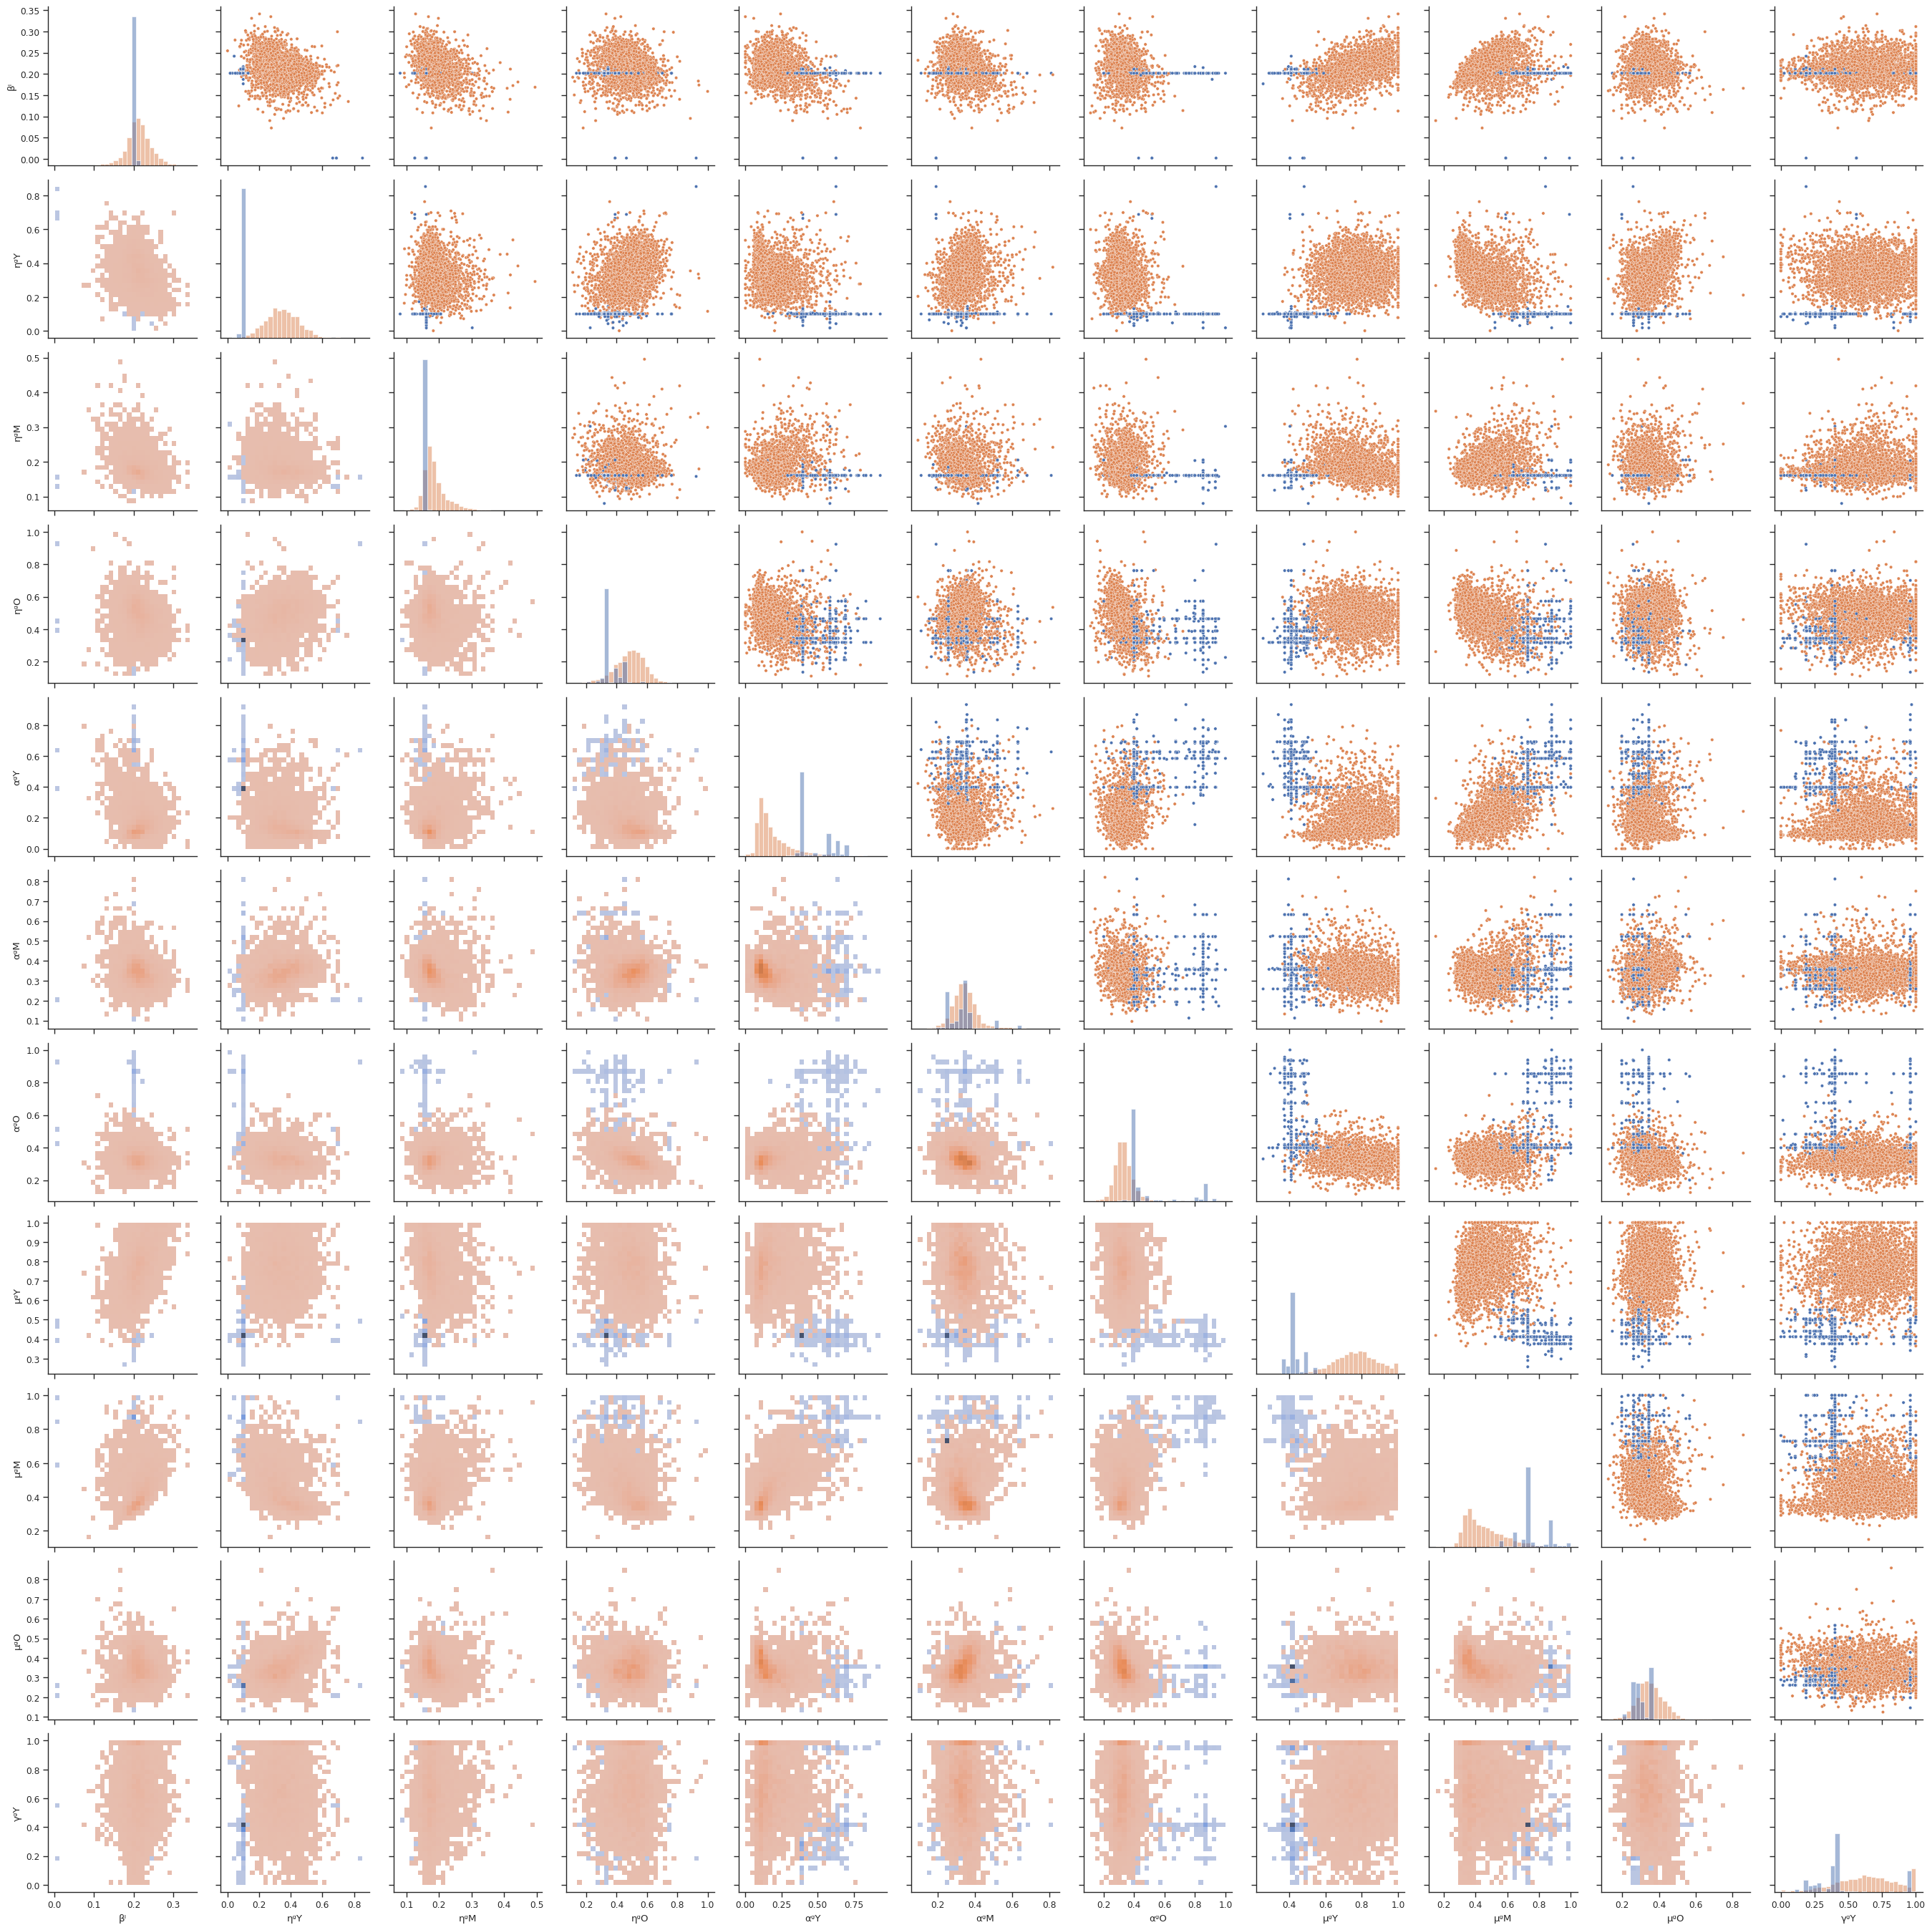

In [114]:
sns.set_theme("paper")
sns.set_style("ticks")

k = 50000
data = df_full.head(k)

N = 5000
columns = ['βᴵ', 'ηᵍY', 'ηᵍM', 'ηᵍO', 'αᵍY', 'αᵍM', 'αᵍO', 'μᵍY', 'μᵍM', 'μᵍO', 'γᵍY', 'algorithm'] 
data = data[columns].sample(N, random_state=42)

g = sns.PairGrid(data, corner=False, hue="algorithm")

g.map_lower(sns.histplot, bins=30)
g.map_diag(sns.histplot, bins=30, common_norm=False)
g.map_upper(sns.scatterplot, s=10)

In [31]:
columns = ['βᴵ', 'βᴬ', 'ηᵍY', 'ηᵍM', 'ηᵍO', 'αᵍY', 'αᵍM', 'αᵍO', 'μᵍY', 'μᵍM', 'μᵍO','γᵍY', 'γᵍM', 'γᵍO', 'δs', 'ϕs'] 
df_cmaes.loc[:, columns].head(100).describe().T.loc[:, ["50%", "std", "min", "max"]]

50%       std       min       max
βᴵ   0.160160  0.011398  0.126037  0.188190
βᴬ   0.024778  0.004028  0.010862  0.037794
ηᵍY  0.316408  0.035582  0.234813  0.425976
ηᵍM  0.158859  0.009801  0.138861  0.180881
ηᵍO  0.354670  0.042890  0.247268  0.449105
αᵍY  0.164574  0.041001  0.083483  0.264905
αᵍM  0.724380  0.077889  0.477267  0.952803
αᵍO  0.278909  0.032360  0.200674  0.395750
μᵍY  0.987902  0.022955  0.901336  1.000000
μᵍM  0.447545  0.056019  0.329097  0.580910
μᵍO  0.436390  0.075819  0.291097  0.663577
γᵍY  0.001978  0.004620  0.000000  0.018876
γᵍM  0.017921  0.004106  0.008960  0.027861
γᵍO  0.221391  0.025068  0.154993  0.280634
δs   0.940336  0.023820  0.892178  1.000000
ϕs   0.222867  0.090046  0.000000  0.420935

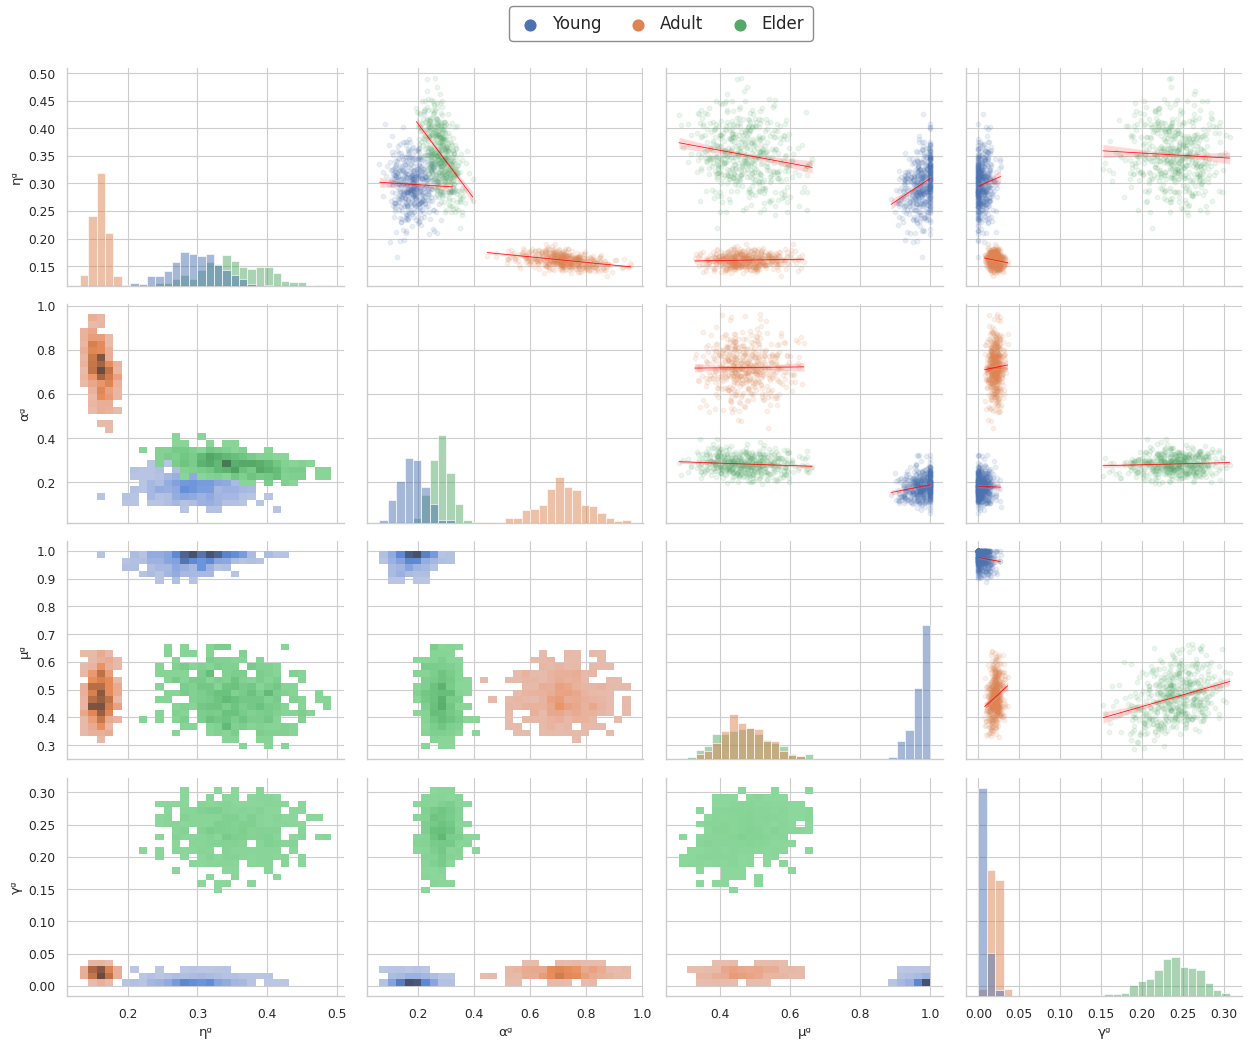

In [20]:
sns.set_theme("paper")
sns.set_style("whitegrid")

columns = ['βᴵ', 'ηᵍY', 'ηᵍM', 'ηᵍO', 'αᵍY', 'αᵍM', 'αᵍO', 'μᵍY', 'μᵍM', 'μᵍO','γᵍY', 'γᵍM', 'γᵍO', 'δs', 'ϕs'] 
k = 500
data = df_cmaes.loc[:, columns].head(k)
#data = df_cmaes[df_cmaes['cost'] <= 0.000609]

df_list = []
params = ['ηᵍ', 'αᵍ', 'μᵍ', 'γᵍ']
age_groups = ['Y', 'M', 'O']
age_labels = {'Y':'Young', 'M': 'Adult', 'O':'Elder'}

for g in age_groups:
    # cols = ['βᴵ'] + [p + g for p in params]
    # cols = [p + g for p in params]
    
    cols = ['δs', 'ϕs'] + [p + g for p in params]
    df = data.loc[:, cols]
    df['age_group'] = age_labels[g]
    df = df.rename({f"{p}{g}": p for p in params}, axis=1)
    df_list.append(df)

data = pd.concat(df_list)

cols = params +['age_group']
g = sns.PairGrid(data[cols], corner=False, hue="age_group", despine=True)
g.map_lower(sns.histplot, bins=30)
g.map_diag(sns.histplot, bins=30, common_norm=False)
g.map_upper(sns.regplot, scatter_kws=dict(s=10, alpha=0.1), line_kws=dict(color="red", lw=0.5))


# Remove the legend title (in case it's still there)
g.add_legend(ncol=3, bbox_to_anchor=(0.65,1.03), edgecolor="gray")
g._legend.set_title(None)
g._legend.set_frame_on(True)
g._legend.get_frame().set_linewidth(1)
g._legend.get_frame().set_alpha(0.9)
g._legend.get_frame().set_boxstyle("round,pad=0.3")  # Fancy rounded frame

# Increase legend label font size
for text in g._legend.get_texts():
    text.set_fontsize(12) 

for lh in g._legend.legend_handles:
    lh.set_alpha(1)
    lh.set_sizes([60])

g.fig.tight_layout()

In [ ]:
ηᵍ	Array{Float64, 1}	G	Exposed (E)  rate for each strata
αᵍ	Array{Float64, 1}	G	Asymptomatic (A) infectious rate for each strata
μᵍ	Array{Float64, 1}	G	Infectious (I) rate for each strata
γᵍ	Array{Float64, 2}	G	ICU probability for each strata (I->PH)

In [256]:
pd.set_option("display.precision", 10)
columns = ['βᴵ', 'ηᵍY', 'ηᵍM', 'ηᵍO', 'αᵍY', 'αᵍM', 'αᵍO', 'μᵍY', 'μᵍM', 'μᵍO'] 
mask = df_cmaes["cost"] < 0.000624
for i in df_cmaes.loc[mask, "instance_path"].values:
    print(f"rsync -avz bsc.transfer1:~/scratch/mn5/episim-emews/{i} experiments/cmaes_50_1118_fit_wide/")


rsync -avz bsc.transfer1:~/scratch/mn5/episim-emews/experiments/cmaes_50_1118_fit_wide/instance_50_782 experiments/cmaes_50_1118_fit_wide/
rsync -avz bsc.transfer1:~/scratch/mn5/episim-emews/experiments/cmaes_50_1118_fit_wide/instance_50_359 experiments/cmaes_50_1118_fit_wide/
rsync -avz bsc.transfer1:~/scratch/mn5/episim-emews/experiments/cmaes_50_1118_fit_wide/instance_50_709 experiments/cmaes_50_1118_fit_wide/
rsync -avz bsc.transfer1:~/scratch/mn5/episim-emews/experiments/cmaes_50_1118_fit_wide/instance_50_938 experiments/cmaes_50_1118_fit_wide/
rsync -avz bsc.transfer1:~/scratch/mn5/episim-emews/experiments/cmaes_50_1118_fit_wide/instance_50_371 experiments/cmaes_50_1118_fit_wide/
rsync -avz bsc.transfer1:~/scratch/mn5/episim-emews/experiments/cmaes_50_1118_fit_wide/instance_50_867 experiments/cmaes_50_1118_fit_wide/
rsync -avz bsc.transfer1:~/scratch/mn5/episim-emews/experiments/cmaes_50_1118_fit_wide/instance_47_218 experiments/cmaes_50_1118_fit_wide/
rsync -avz bsc.transfer1:~/

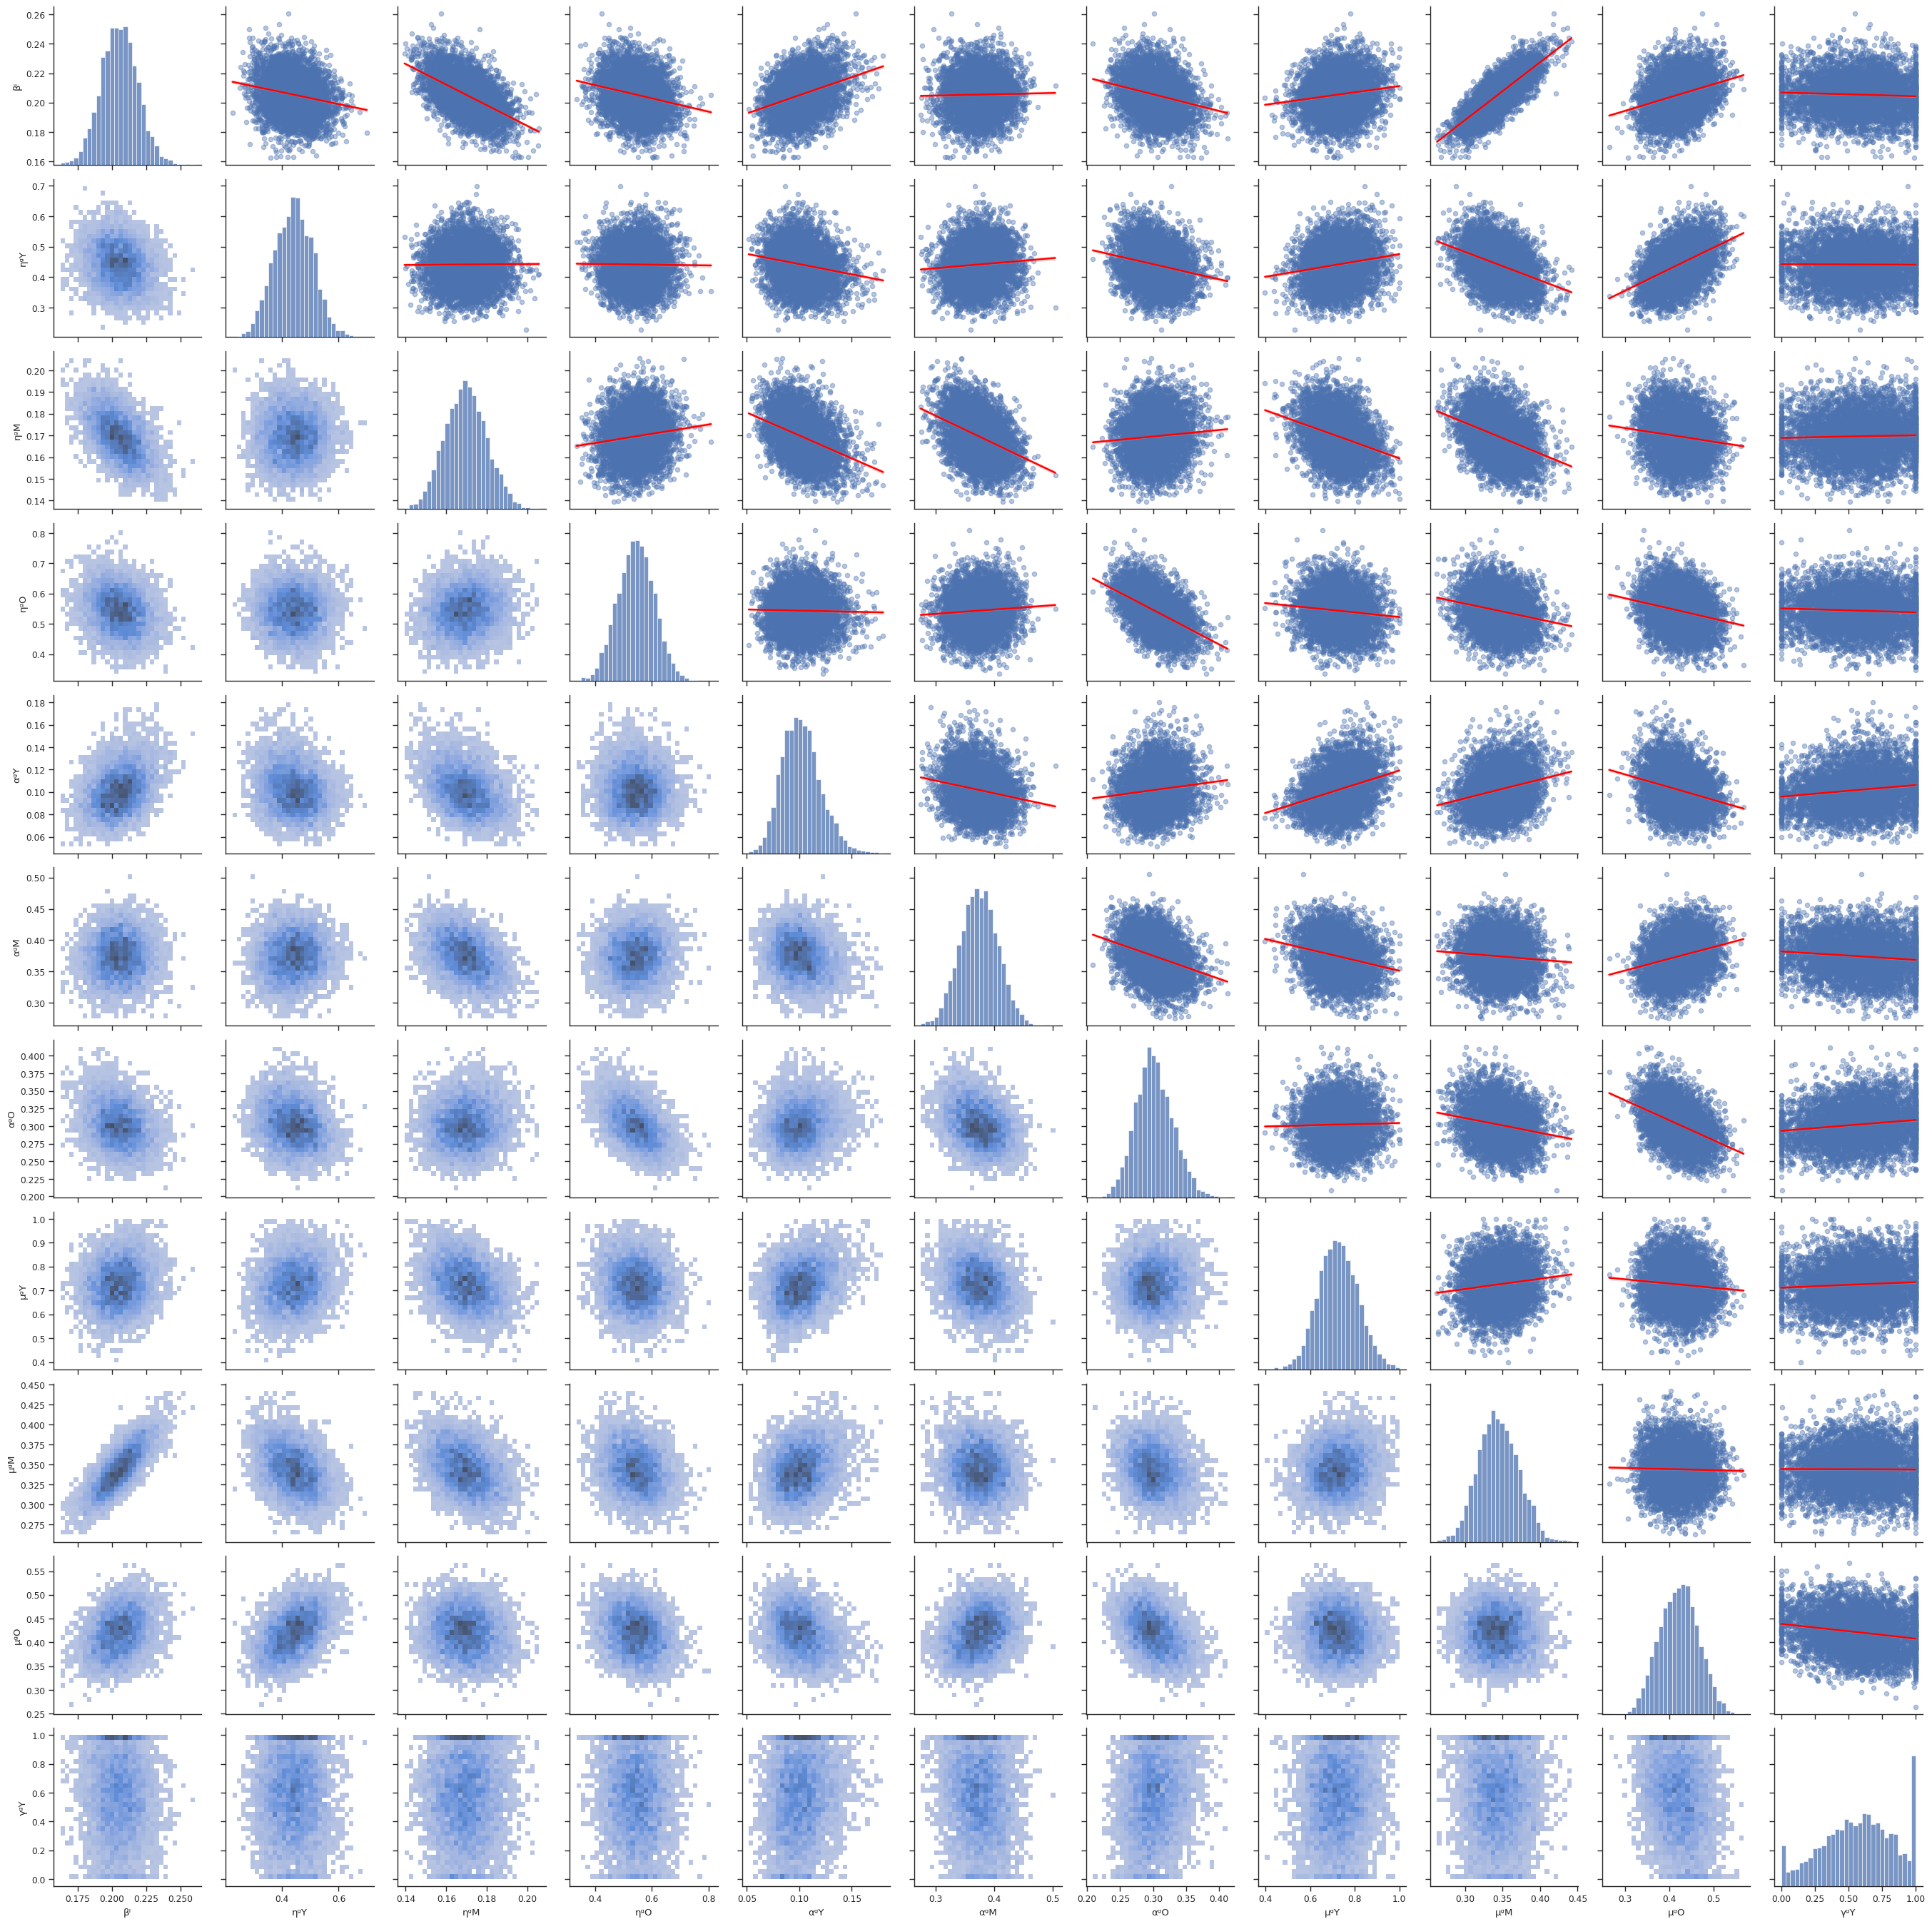

In [129]:
sns.set_theme("paper")
sns.set_style("ticks")

columns = ['βᴵ', 'ηᵍY', 'ηᵍM', 'ηᵍO', 'αᵍY', 'αᵍM', 'αᵍO', 'μᵍY', 'μᵍM', 'μᵍO', 'algorithm'] 
k = 100
data = df_cmaes.loc[:, columns].head(N)

g = sns.PairGrid(data, corner=False)

g.map_lower(sns.histplot, bins=30)
g.map_diag(sns.histplot, bins=30, common_norm=False)
g.map_upper(sns.regplot, scatter_kws=dict(s=20, alpha=0.4), line_kws=dict(color="red"))

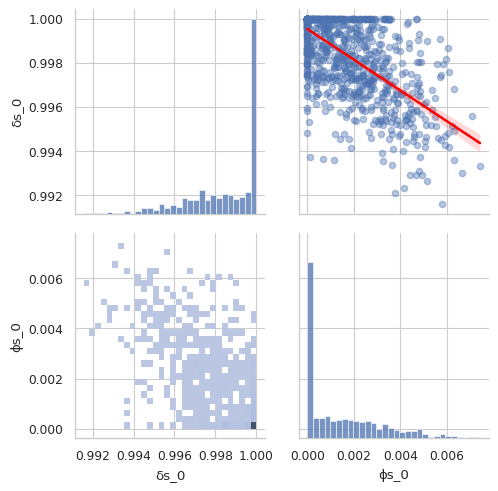

In [17]:
sns.set_theme("paper")
sns.set_style("whitegrid")

columns = ["δs_0", "ϕs_0"]
k = 1000
data = df_cmaes_old.loc[:, columns].head(k)

g = sns.PairGrid(data, corner=False)

g.map_lower(sns.histplot, bins=30)
g.map_diag(sns.histplot, bins=30, common_norm=False)
g.map_upper(sns.regplot, scatter_kws=dict(s=20, alpha=0.4), line_kws=dict(color="red"))

In [12]:
import json
import xskillscore as xs
import sys
sys.path.append("../python")
import episim_utils

def fit_epicurves(
    sim_ds,
    instance_folder,
    data_folder,
    obsdata_fname="real_observables.nc",
    epi_variable="new_deaths",
    metric="rmse",
    smooth_obs=True,
    scale_by_pop=True,
    agg_level="level_2",
    agg_func="sum",
    weight_by_population=False,
    scale_factor=1e5,
    varlist = ['new_infected', 'new_hospitalized', 'new_deaths'],
    epsilon = 1e-9
):
    """
    Compute a fitting score between simulated and observed epidemic curves.

    Parameters
    ----------
    sim_ds : xarray.Dataset
        Simulated epidemic data including time (`T`) and variables such as 'new_infected', 'new_hospitalized', 'new_deaths'.
    instance_folder : str
        Path to the simulation instance folder containing the 'episim_config.json' file.
    data_folder : str
        Path to the folder containing observational data files like 'real_observables.nc' and 'rosetta.csv'.
    epivar : str, default="new_deaths"
        Name of the epidemic variable to evaluate (e.g., "new_deaths", "new_infected").
    metric : str, default="rmse"
        Error metric to use for comparison. Options: "rmse", "mape".
    smooth_obs : bool, default=True
        Whether to apply a 7-day rolling average to observational data.
    scale_by_pop : bool, default=True
        Whether to scale observed and simulated values by population (per capita).
    agg_level : str, default="level_2"
        Spatial aggregation level used to align data across regions.
    weight_by_population : bool, default=False
        Whether to apply population-weighted aggregation of error metrics.
    scale_factor : float, default=1e5
        Scaling factor used when applying population weights (e.g., to report per 100,000).

    Returns
    -------
    float
        Aggregated fitting score based on the chosen metric and epidemic variable.
    """

    # Load simulation configuration
    config_path = os.path.join(instance_folder, "episim_config.json")
    with open(config_path) as fh:
        config_dict = json.load(fh)

    # Extract time bounds
    start_date = config_dict['simulation']['start_date']
    end_date = config_dict['simulation']['end_date']

    # Load observed epidemic data
    obs_path = os.path.join(data_folder, obsdata_fname)
    obs_ds = xr.load_dataset(obs_path)

    # Apply optional smoothing (7-day rolling mean)
    if smooth_obs:
        obs_ds = obs_ds.rolling(T=7, center=True, min_periods=1).mean()

    # Ensure datetime types and clip to simulation period
    sim_ds['T'] = pd.to_datetime(sim_ds['T'].values)
    sim_ds = sim_ds.sel(T=slice(start_date, end_date))

    obs_ds['T'] = pd.to_datetime(obs_ds['T'].values)
    obs_ds = obs_ds.sel(T=slice(start_date, end_date))
    
    # Keep only relevant variables
    sim_ds = sim_ds[varlist]
    obs_ds = obs_ds[varlist]

    # Align time and space
    obs_ds, sim_ds = xr.align(obs_ds, sim_ds)

    if epi_variable not in varlist:
        raise ValueError(f"Unsupported epivar: {epi_variable}. Use: ", varlist)

    # Load population data
    pop_fname = config_dict["data"]["metapopulation_data_filename"]
    metapop_csv = os.path.join(data_folder, pop_fname)
    rosetta_csv = os.path.join(data_folder, "rosetta.csv")
    metapop = episim_utils.Metapopulation(metapop_csv, rosetta_csv=rosetta_csv)
    pop_da = metapop.aggregate_to_level(agg_level)

    # Optionally scale values by population
    if scale_by_pop:
        obs_ds = obs_ds / pop_da
        sim_ds = sim_ds / pop_da

    # Compute error metric
    if metric == "rmse":
        cost_ds = xs.rmse(obs_ds, sim_ds, dim="T")
    elif metric == "mape":
        cost_ds = xs.mape(obs_ds, sim_ds+epsilon, dim="T")
    elif metric == "mae":
        cost_ds = xs.mae(obs_ds, sim_ds+epsilon, dim="T")
    else:
        raise ValueError(f"Unsupported metric: {metric}. Use 'rmse', 'mape' or 'mae.")

    # Apply optional population-weighting to the error values
    if weight_by_population:
        pop_weights_da = pop_da / pop_da.sum()
        cost_ds, pop_weights_da = xr.align(cost_ds, pop_weights_da)
        cost_ds = cost_ds * pop_weights_da * scale_factor

    # Return the summed metric for the specified epidemic variable
    return cost_ds


In [11]:
import glob
series = {}

experiment_folder = "../experiments/cmaes_50_1118_fit_wide_by_age/"
data_folder = os.path.join(experiment_folder, "data")
for instance_folder in glob.glob(os.path.join(experiment_folder, "instance_*")):
    sim_ds_fname = os.path.join(instance_folder, "output/obs_agg.nc")
    sim_ds = xr.load_dataset(sim_ds_fname)
    metrics_ds = fit_epicurves(sim_ds, instance_folder, data_folder)
    iid = instance_folder.split("/")[-1]
    series[iid] = metrics_ds.sum().to_pandas()


NameError: name 'fit_epicurves' is not defined

In [108]:
epivariable_weights = {
                "new_infected":0.0, 
                "new_hospitalized": 1, 
                "new_deaths":0.0
}

cost_ds = metrics_ds.sum()
cost = 0
for k,v in epivariable_weights.items():
    cost += float(cost_ds[k] * v)

cost

0.03209469769955204

In [109]:
import numpy as np
df = pd.DataFrame(series).T

weights = np.array([0.0, 0.01, 0.99])
print(df * weights)

df["weighted_cost"] = (df * weights).sum(axis=1)
df["rank"] = range(1,df.shape[0]+1)
df.sort_values(by="weighted_cost")



                 new_infected  new_hospitalized  new_deaths
instance_50_702           0.0          0.000429    0.000592
instance_49_896           0.0          0.000100    0.000592
instance_48_389           0.0          0.000163    0.000593
instance_49_780           0.0          0.000359    0.000592
instance_50_20            0.0          0.000348    0.000592
instance_50_179           0.0          0.000159    0.000592
instance_50_506           0.0          0.000295    0.000593
instance_49_512           0.0          0.000176    0.000592
instance_47_733           0.0          0.000321    0.000593


new_infected  new_hospitalized  new_deaths  weighted_cost  \
instance_49_896      0.129142          0.009983    0.000598       0.000692   
instance_50_179      0.119874          0.015944    0.000598       0.000752   
instance_48_389      0.115341          0.016261    0.000599       0.000755   
instance_49_512      0.118512          0.017582    0.000598       0.000768   
instance_50_506      0.106672          0.029460    0.000599       0.000888   
instance_47_733      0.121793          0.032095    0.000599       0.000914   
instance_50_20       0.118088          0.034770    0.000598       0.000940   
instance_49_780      0.120396          0.035922    0.000598       0.000952   
instance_50_702      0.139928          0.042874    0.000598       0.001021   

                 rank  
instance_49_896     2  
instance_50_179     6  
instance_48_389     3  
instance_49_512     8  
instance_50_506     7  
instance_47_733     9  
instance_50_20      5  
instance_49_780     4  
instance_50_702     1

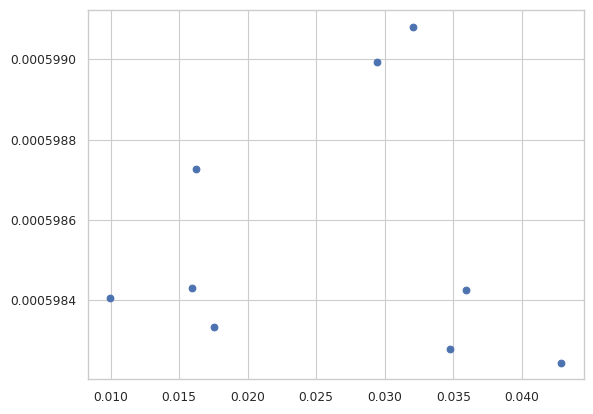

In [96]:
plt.scatter(df["new_hospitalized"], df["new_deaths"])